In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from math import fsum, sqrt
from scipy.stats import shapiro
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(7)

In [3]:
cars = pd.read_csv('car_data.csv', sep=',')
cars.head()

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2


In [4]:
# Bỏ cột STT
cars.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
cars.head()

,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2


In [6]:
cars.shape

(42089, 12)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_brand            42089 non-null  object 
 1   car_model            42089 non-null  object 
 2   car_price            42089 non-null  int64  
 3   car_city             42089 non-null  object 
 4   car_fuel             42089 non-null  object 
 5   car_transmission     42089 non-null  object 
 6   car_drive            42089 non-null  object 
 7   car_mileage          42089 non-null  int64  
 8   car_country          42089 non-null  object 
 9   car_engine_capacity  42089 non-null  float64
 10  car_engine_hp        42089 non-null  int64  
 11  car_age              42089 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 3.9+ MB


In [8]:
cars.describe()

,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


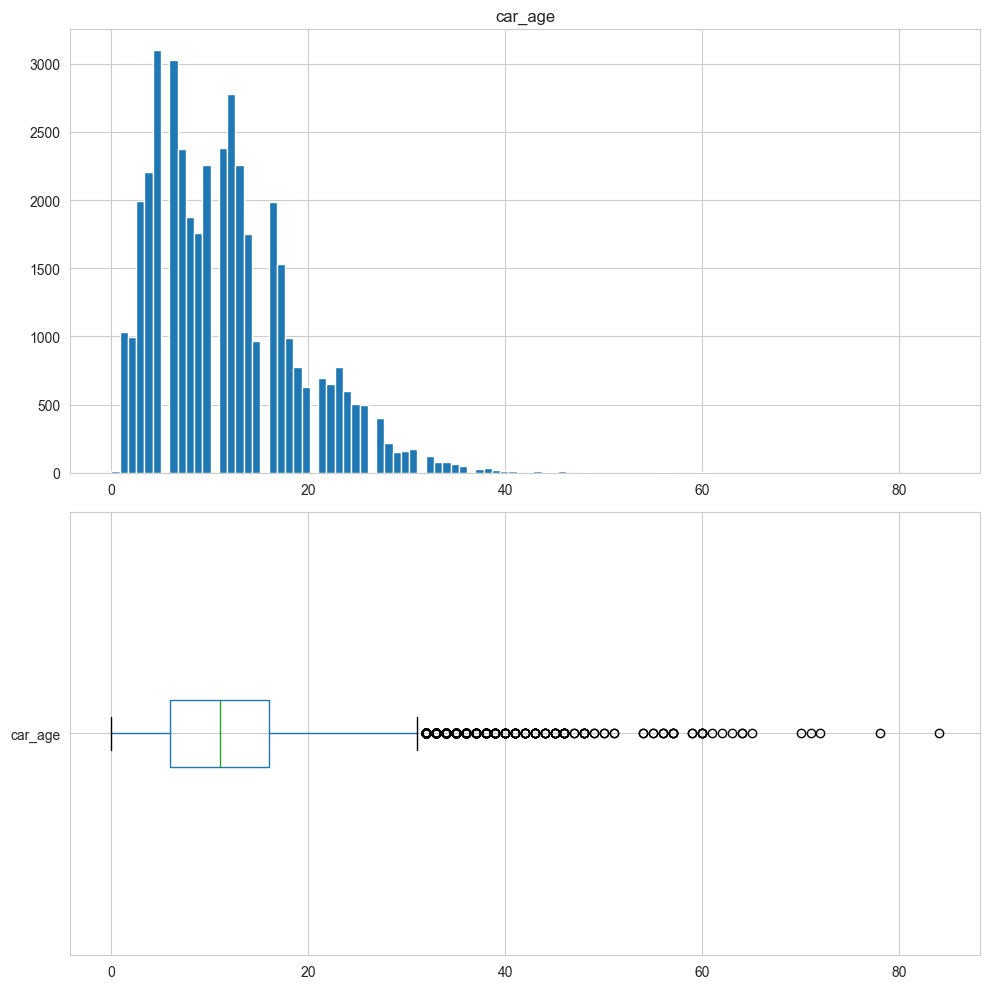

In [9]:
# Distribution of car prices
# plt.figure(figsize=(15, 6))
# sns.histplot(data=cars, x='car_price', bins=100, kde=True)
# plt.axvline(cars['car_price'].mean(), label='90% quantile', c='orange')
# plt.title('Distribution of Car Price')
# plt.xlabel('Price')
# plt.ylabel('Frequency')
# plt.show()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
cars[['car_age']].hist(bins=100, ax=axes[0])
cars[['car_age']].boxplot(ax=axes[1], vert=False)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Car brand')

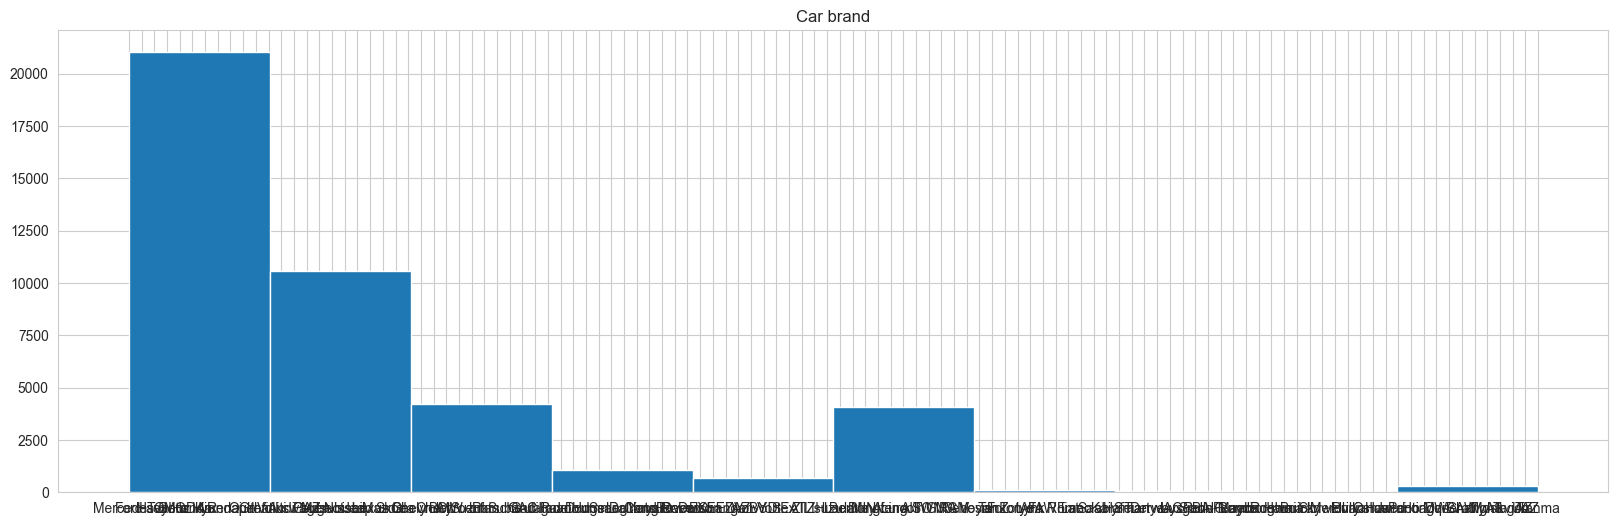

In [10]:
plt.figure(figsize=(20, 6))
cars['car_brand'].hist().set_title('Car brand')

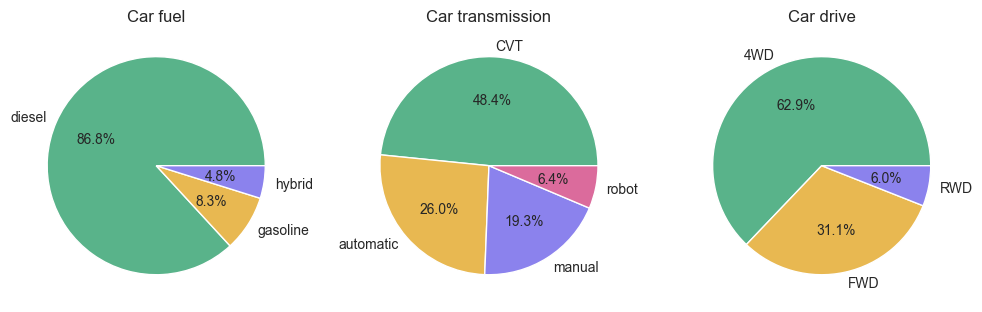

In [14]:
colors = ['#59b38a', '#e8b851', '#8b82ed', '#db6b9c']

plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Car fuel')
plt.pie(cars['car_fuel'].value_counts(), autopct='%1.1f%%',
        labels=['diesel', 'gasoline', 'hybrid'], colors=colors)


plt.subplot(1, 3, 2)
plt.title('Car transmission')
plt.pie(cars['car_transmission'].value_counts(), autopct='%1.1f%%',
        labels=['CVT', 'automatic', 'manual', 'robot'], colors=colors)

plt.subplot(1, 3, 3)
plt.title('Car drive')
plt.pie(cars['car_drive'].value_counts(), autopct='%1.1f%%',
        labels=['4WD', 'FWD', 'RWD'], colors=colors)

plt.tight_layout()
plt.show()
